In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/weatherAUS.csv')

In [ ]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop_duplicates()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [ ]:
df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

In [ ]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

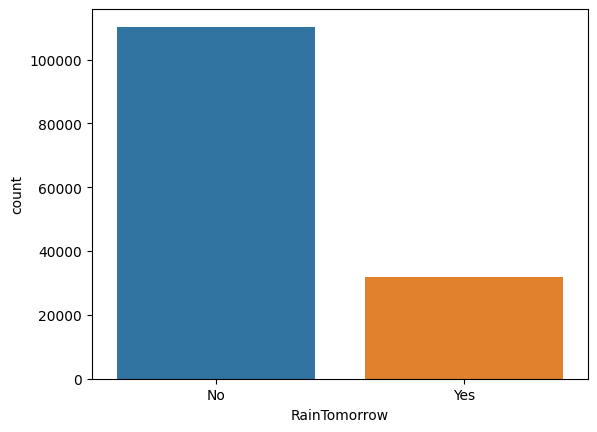

In [ ]:
sns.countplot(x ='RainTomorrow', data = df)
plt.show()

In [ ]:
data_yes = df[df['RainTomorrow']=='Yes']
data_no = df[df['RainTomorrow']=='No']

In [ ]:
#For Temparatures we cannot replace NaN values with 0, hence replacing NaN with its respective mode value
data_yes['MinTemp'].fillna(value=data_yes['MinTemp'].mode()[0],inplace=True )
data_no['MinTemp'].fillna(value=data_no['MinTemp'].mode()[0],inplace=True )

data_yes['MaxTemp'].fillna(value=data_yes['MaxTemp'].mode()[0],inplace=True )
data_no['MaxTemp'].fillna(value=data_no['MaxTemp'].mode()[0],inplace=True )


data_yes['Temp9am'].fillna(value=data_yes['Temp9am'].mode()[0],inplace=True )
data_no['Temp9am'].fillna(value=data_no['Temp9am'].mode()[0],inplace=True )

data_yes['Temp3pm'].fillna(value=data_yes['Temp3pm'].mode()[0],inplace=True )
data_no['Temp3pm'].fillna(value=data_no['Temp3pm'].mode()[0],inplace=True )


# For humidity also
data_yes['Humidity9am'].fillna(value=data_yes['Humidity9am'].mode()[0],inplace=True )
data_no['Humidity9am'].fillna(value=data_no['Humidity9am'].mode()[0],inplace=True )



data_yes['Humidity3pm'].fillna(value=data_yes['Humidity3pm'].mode()[0],inplace=True )
data_no['Humidity3pm'].fillna(value=data_no['Humidity3pm'].mode()[0],inplace=True )

# For the rain fall feature we can replace NaN with 0.0 which says there is no rain fall
data_yes['Rainfall'].fillna(value=0.0,inplace=True)
data_no['Rainfall'].fillna(value=0.0,inplace=True)


data_yes['Pressure9am'].fillna(value=data_yes['Pressure9am'].median(),inplace=True )
data_no['Pressure9am'].fillna(value=data_no['Pressure9am'].median(),inplace=True )

data_yes['Pressure3pm'].fillna(value=data_yes['Pressure3pm'].median(),inplace=True )
data_no['Pressure3pm'].fillna(value=data_no['Pressure3pm'].median(),inplace=True )


data_yes['WindSpeed9am'].fillna(value=data_yes['WindSpeed9am'].median(),inplace=True )
data_no['WindSpeed9am'].fillna(value=data_no['WindSpeed9am'].median(),inplace=True )

data_yes['WindSpeed3pm'].fillna(value=data_yes['WindSpeed3pm'].median(),inplace=True )
data_no['WindSpeed3pm'].fillna(value=data_no['WindSpeed3pm'].median(),inplace=True )

#WindGustSpeed -- replacing with median
data_yes['WindGustSpeed'].fillna(value=data_yes['WindGustSpeed'].median(),inplace=True)
data_no['WindGustSpeed'].fillna(value=data_no['WindGustSpeed'].median(),inplace=True)

data_yes['WindDir9am'].fillna(value=data_yes['WindDir9am'].mode()[0],inplace=True)
data_no['WindDir9am'].fillna(value=data_no['WindDir9am'].mode()[0],inplace=True)

data_yes['WindDir3pm'].fillna(value=data_yes['WindDir3pm'].mode()[0],inplace=True)
data_no['WindDir3pm'].fillna(value=data_no['WindDir3pm'].mode()[0],inplace=True)

data_yes['WindGustDir'].fillna(value=data_yes['WindGustDir'].mode()[0],inplace=True)
data_no['WindGustDir'].fillna(value=data_no['WindGustDir'].mode()[0],inplace=True)

data_yes['WindGustSpeed'].fillna(value=data_yes['WindGustSpeed'].mode()[0],inplace=True)
data_no['WindGustSpeed'].fillna(value=data_no['WindGustSpeed'].mode()[0],inplace=True)

data_yes['Sunshine'].fillna(value=data_yes['Sunshine'].mode()[0],inplace=True)
data_no['Sunshine'].fillna(value=data_no['Sunshine'].mode()[0],inplace=True)





In [ ]:
df2 = data_yes.append(data_no,ignore_index=True)

In [ ]:
df2.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation      60843
Sunshine             0
WindGustDir          0
WindGustSpeed        0
WindDir9am           0
WindDir3pm           0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am         53657
Cloud3pm         57094
Temp9am              0
Temp3pm              0
RainToday         1406
RainTomorrow         0
dtype: int64

In [ ]:
df2.dropna(inplace=True)

In [ ]:
df2.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [ ]:
df2.shape

(68376, 23)

In [ ]:
df2 = pd.get_dummies(df2,columns = ['RainTomorrow'],drop_first=True)

In [ ]:
corr=df2.corr()
corr

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow_Yes
MinTemp,1.000000,0.748183,0.108738,0.468111,0.052540,0.140105,0.132333,0.142789,-0.179821,0.064092,-0.481591,-0.498063,0.111905,0.055454,0.906366,0.724934,0.090038
MaxTemp,0.748183,1.000000,-0.073379,0.598373,0.429020,0.059099,0.012641,0.022757,-0.497518,-0.451486,-0.361950,-0.459416,-0.267902,-0.251232,0.892367,0.984061,-0.145825
Rainfall,0.108738,-0.073379,1.000000,-0.065750,-0.243671,0.105667,0.054199,0.043827,0.263960,0.274801,-0.178567,-0.134251,0.220751,0.192376,0.010952,-0.077806,0.254362
Evaporation,0.468111,0.598373,-0.065750,1.000000,0.317030,0.206763,0.198420,0.130580,-0.513573,-0.392633,-0.274593,-0.298471,-0.186723,-0.185285,0.546821,0.579661,-0.118866
Sunshine,0.052540,0.429020,-0.243671,0.317030,1.000000,-0.059218,-0.003386,0.039265,-0.480908,-0.611094,0.050366,-0.008587,-0.647394,-0.671791,0.258228,0.452332,-0.502105
WindGustSpeed,0.140105,0.059099,0.105667,0.206763,-0.059218,1.000000,0.583800,0.660715,-0.195710,-0.043367,-0.423351,-0.379243,0.081792,0.124418,0.109266,0.023081,0.234272
WindSpeed9am,0.132333,0.012641,0.054199,0.198420,-0.003386,0.583800,1.000000,0.495205,-0.251273,-0.067497,-0.202948,-0.154895,0.028482,0.056107,0.079648,0.002040,0.077482
WindSpeed3pm,0.142789,0.022757,0.043827,0.130580,0.039265,0.660715,0.495205,1.000000,-0.113554,0.022264,-0.286618,-0.244902,0.059783,0.025891,0.125175,0.001143,0.075828
Humidity9am,-0.179821,-0.497518,0.263960,-0.513573,-0.480908,-0.195710,-0.251273,-0.113554,1.000000,0.686118,0.115366,0.170466,0.437752,0.348336,-0.425322,-0.489744,0.272716
Humidity3pm,0.064092,-0.451486,0.274801,-0.392633,-0.611094,-0.043367,-0.067497,0.022264,0.686118,1.000000,-0.056173,0.028215,0.513591,0.509768,-0.157080,-0.501139,0.451916


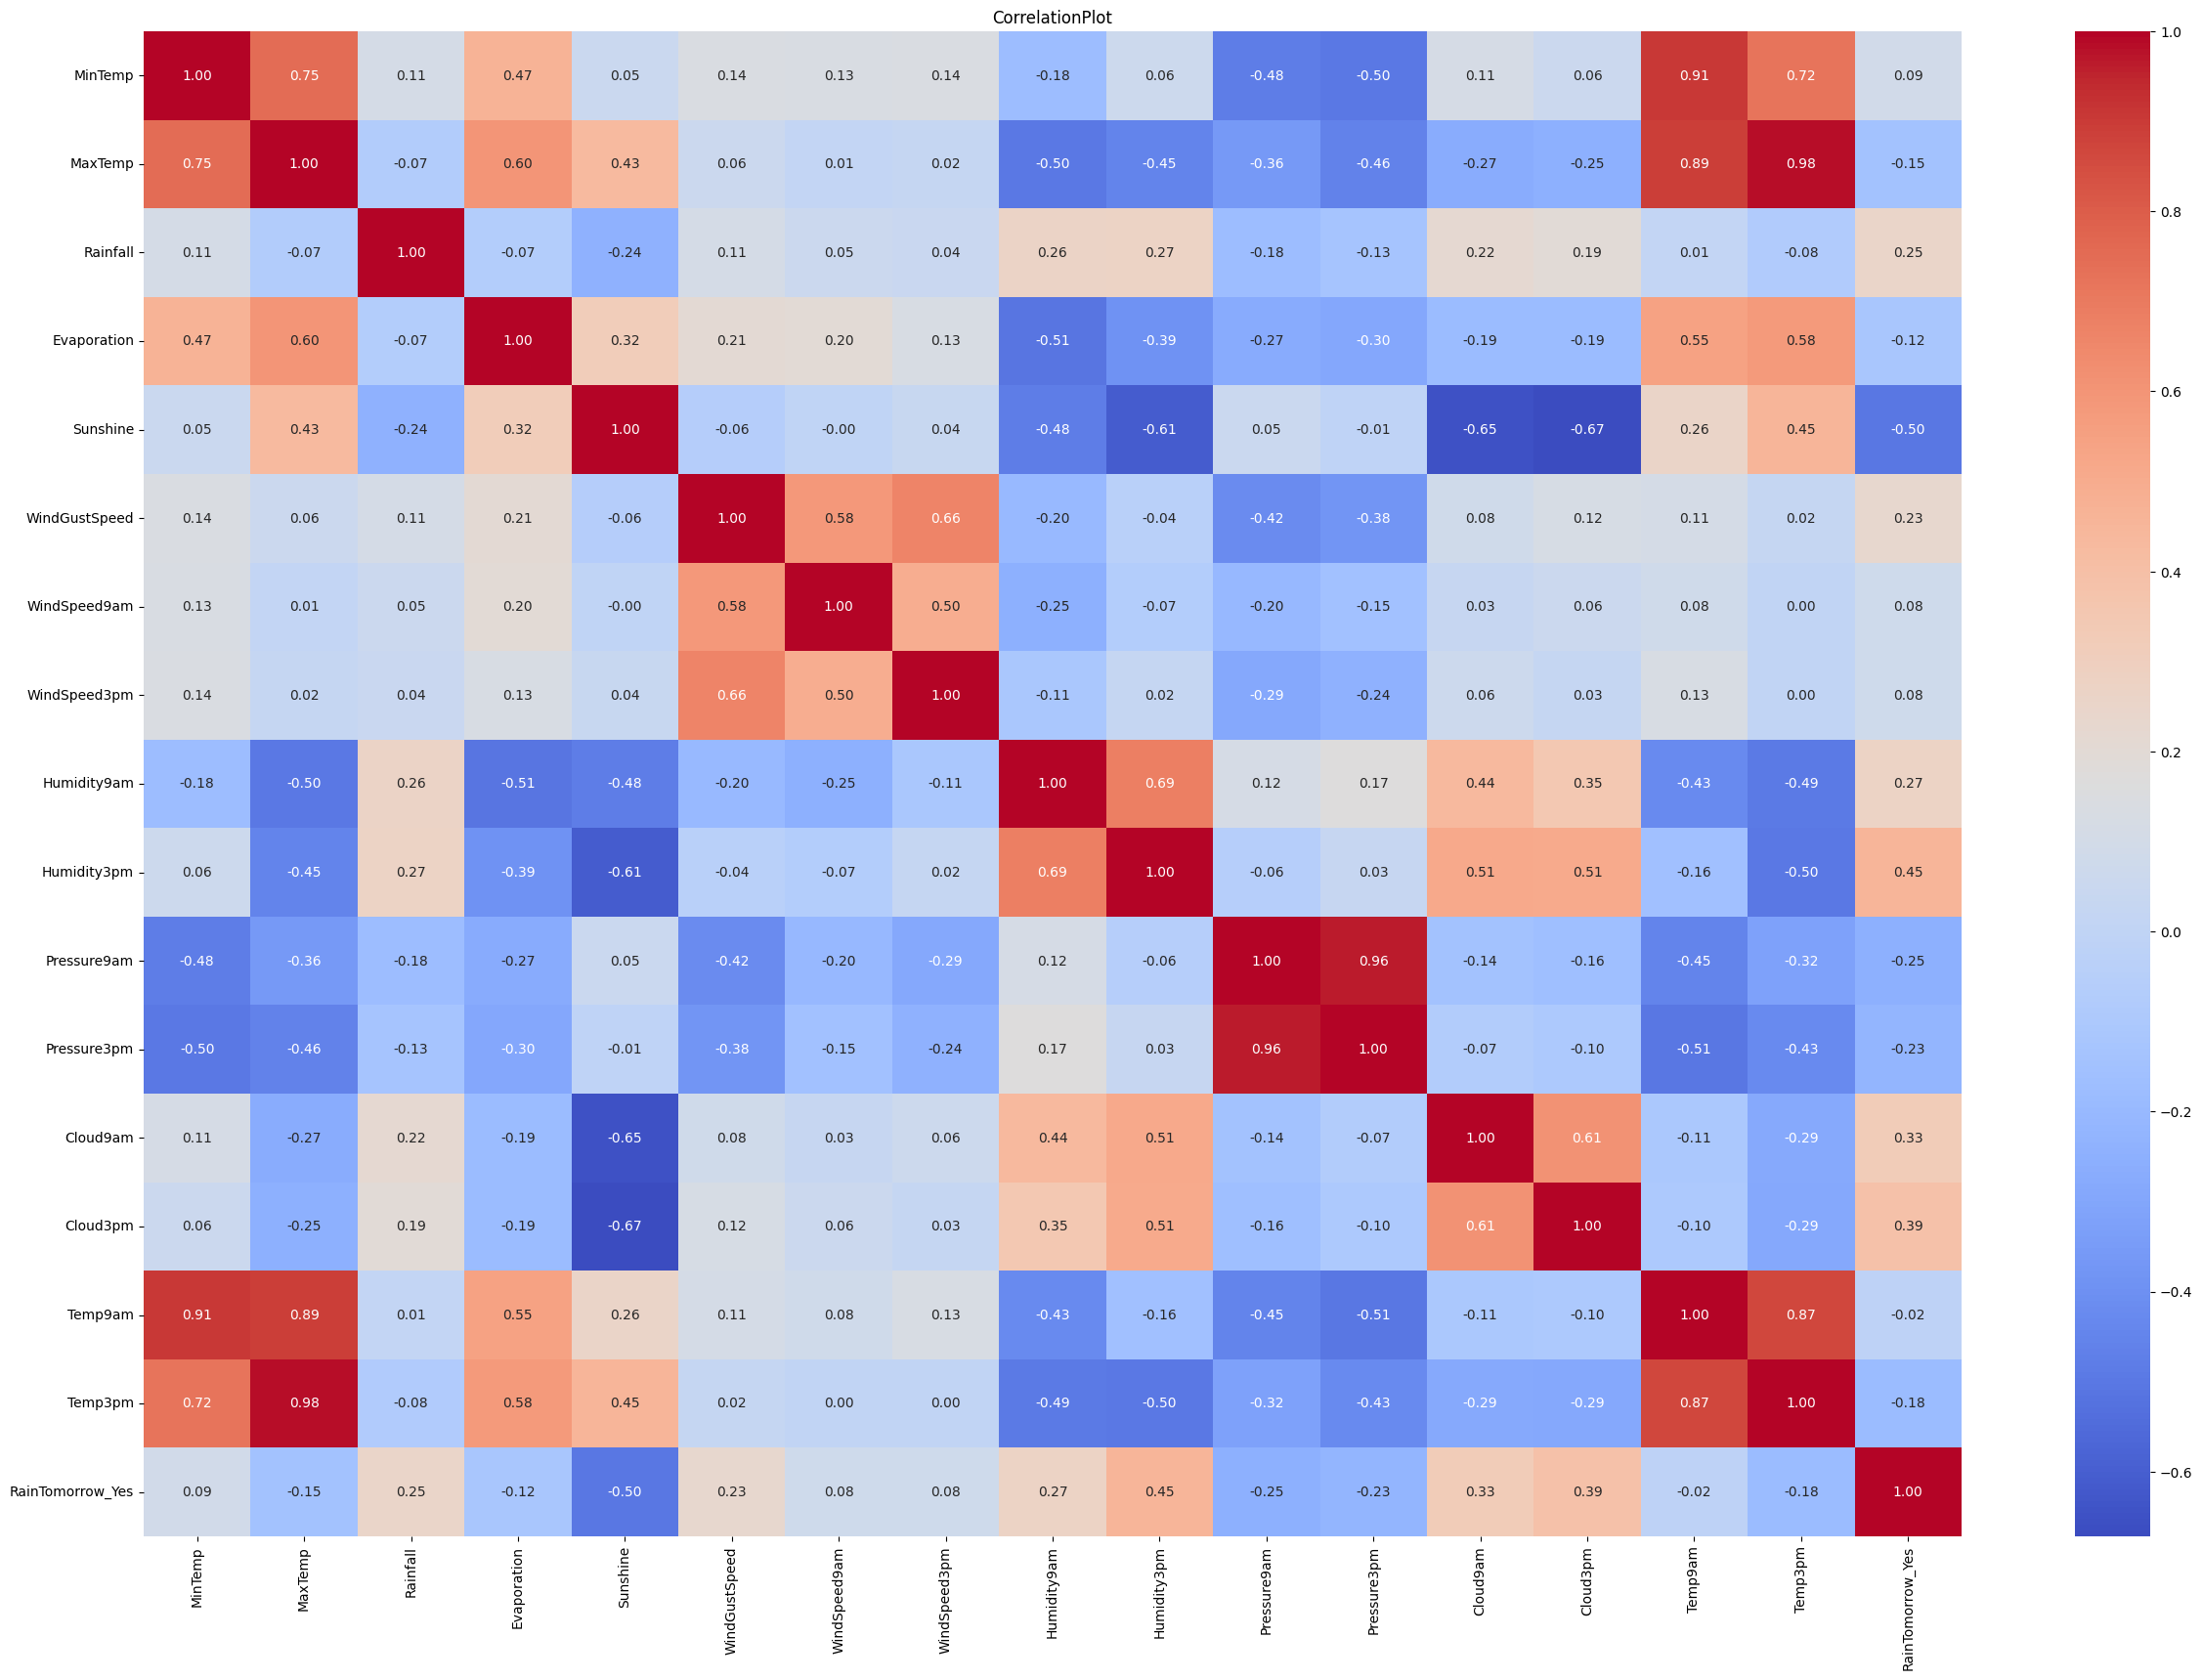

In [ ]:
plt.figure(figsize=(30,20))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt=".2f")
plt.title('CorrelationPlot')
plt.show()

In [ ]:
df2.shape

(68376, 23)

<Axes: >

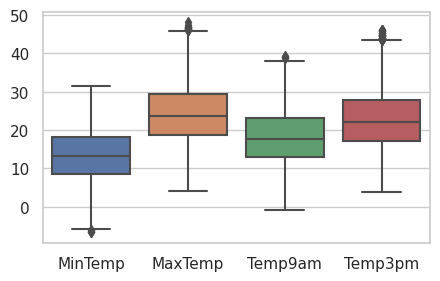

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(5, 3))
sns.boxplot(data=df2[['MinTemp','MaxTemp','Temp9am','Temp3pm']])

<Axes: >

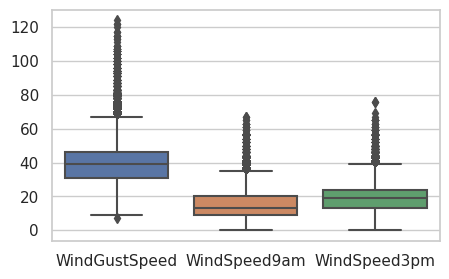

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(5,3))
sns.boxplot(data=df2[['WindGustSpeed','WindSpeed9am','WindSpeed3pm']])

<Axes: >

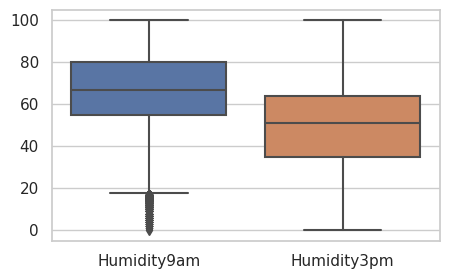

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(5,3))
sns.boxplot(data=df2[['Humidity9am','Humidity3pm']])

In [ ]:
df2 = df2[df2['Humidity3pm']!=0.0]
df2 = df2[df2['Humidity9am']!=0.0]

<Axes: >

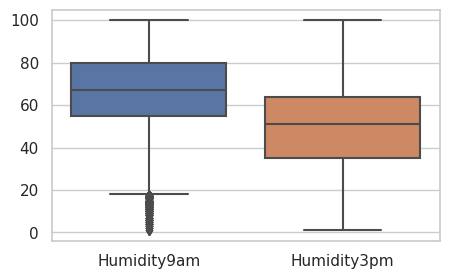

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(5,3))
sns.boxplot(data=df2[['Humidity9am','Humidity3pm']])

<Axes: >

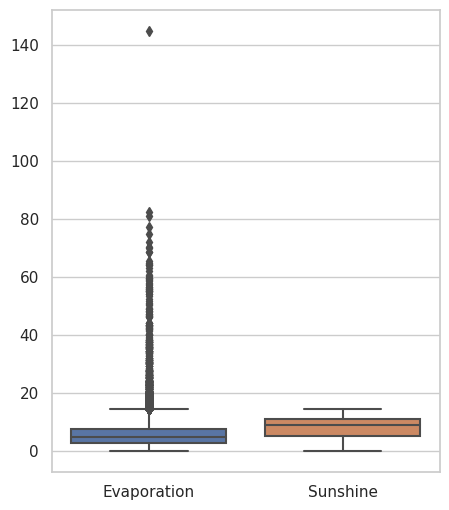

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(5, 6))
sns.boxplot(data=df2[['Evaporation','Sunshine']])

<Axes: >

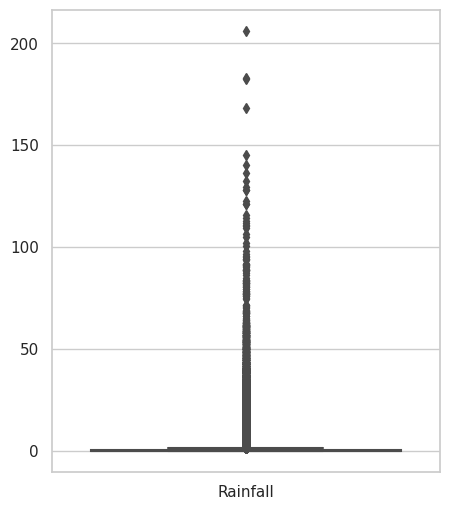

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(5, 6))
sns.boxplot(data=df2[['Rainfall']])

<Axes: >

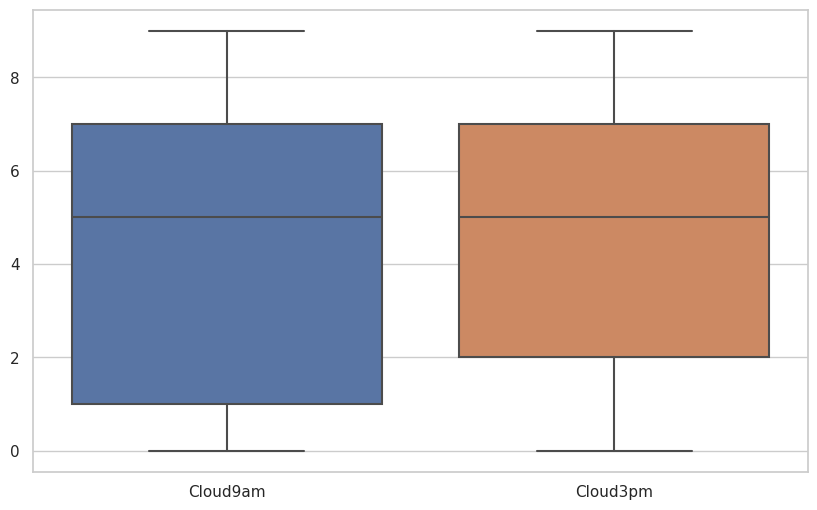

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df2[['Cloud9am','Cloud3pm']])

<Axes: >

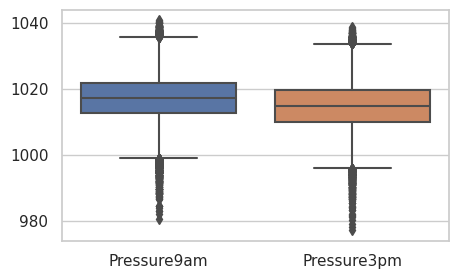

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(5,3))
sns.boxplot(data=df2[['Pressure9am','Pressure3pm']])

In [ ]:
from sklearn.preprocessing import LabelEncoder


WindGustDir_encode = LabelEncoder()
df2['WindGustDir']=WindGustDir_encode.fit_transform(df2['WindGustDir'])

WindDir9am_encode = LabelEncoder()
df2['WindDir9am']=WindDir9am_encode.fit_transform(df2['WindDir9am'])

WindDir3pm_encode = LabelEncoder()
df2['WindDir3pm']=WindDir3pm_encode.fit_transform(df2['WindDir3pm'])

RainToday_encode = LabelEncoder()
df2['RainToday']=RainToday_encode.fit_transform(df2['RainToday'])

Location_encode = LabelEncoder()
df2['Location']=Location_encode.fit_transform(df2['Location'])

In [ ]:
# data = ["WindGustDir","WindDir9am","WindDir3pm","RainToday","Location"]

# label_encoder = LabelEncoder()
# label_encoder.fit(data)


LabelEncoder()

In [ ]:
#df2=df2.drop(['Date'],axis=1)

In [ ]:

df2.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow_Yes'],
      dtype='object')

In [ ]:
df2.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow_Yes'],
      dtype='object')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68372 entries, 1201 to 140240
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Location          68372 non-null  int64  
 1   MinTemp           68372 non-null  float64
 2   MaxTemp           68372 non-null  float64
 3   Rainfall          68372 non-null  float64
 4   Evaporation       68372 non-null  float64
 5   Sunshine          68372 non-null  float64
 6   WindGustDir       68372 non-null  int64  
 7   WindGustSpeed     68372 non-null  float64
 8   WindDir9am        68372 non-null  int64  
 9   WindDir3pm        68372 non-null  int64  
 10  WindSpeed9am      68372 non-null  float64
 11  WindSpeed3pm      68372 non-null  float64
 12  Humidity9am       68372 non-null  float64
 13  Humidity3pm       68372 non-null  float64
 14  Pressure9am       68372 non-null  float64
 15  Pressure3pm       68372 non-null  float64
 16  Cloud9am          68372 non-null  fl

In [ ]:
Y= df2['RainTomorrow_Yes']
X = df2.drop(['RainTomorrow_Yes'],axis=1)

In [ ]:
column_names = X.columns.tolist()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.80)
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
log_score = accuracy_score(y_test,y_pred)
print(log_score*100)
report = classification_report(y_test,y_pred)
print(report)

86.61060329067641
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     10675
           1       0.75      0.58      0.66      3000

    accuracy                           0.87     13675
   macro avg       0.82      0.76      0.79     13675
weighted avg       0.86      0.87      0.86     13675



In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)
dt_score = accuracy_score(y_test,y_pred_dt)
print(dt_score*100)
report = classification_report(y_test,y_pred_dt)
print(report)

82.25228519195612
              precision    recall  f1-score   support

           0       0.89      0.88      0.89     10675
           1       0.59      0.61      0.60      3000

    accuracy                           0.82     13675
   macro avg       0.74      0.75      0.74     13675
weighted avg       0.82      0.82      0.82     13675



In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_train, y_train)
dt.fit(X_balanced,y_balanced)
y_pred_dt = dt.predict(X_test)
dt_score = accuracy_score(y_test,y_pred_dt)
print(dt_score*100)
report = classification_report(y_test,y_pred_dt)
print(report)

81.08226691042047
              precision    recall  f1-score   support

           0       0.90      0.85      0.88     10675
           1       0.56      0.66      0.60      3000

    accuracy                           0.81     13675
   macro avg       0.73      0.76      0.74     13675
weighted avg       0.82      0.81      0.82     13675



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
rf_classifier = RandomForestClassifier()
model_rf = rf_classifier.fit(X_balanced,y_balanced)
y_pred_rf = rf_classifier.predict(X_test)
rf_score = accuracy_score(y_test,y_pred_rf)
print(rf_score*100)
report = classification_report(y_test,y_pred_rf)
print(report)

87.54661791590493
              precision    recall  f1-score   support

           0       0.92      0.92      0.92     10675
           1       0.71      0.73      0.72      3000

    accuracy                           0.88     13675
   macro avg       0.82      0.82      0.82     13675
weighted avg       0.88      0.88      0.88     13675



In [ ]:
cf_m = confusion_matrix(y_test,y_pred_dt)
print(cf_m)

[[9115 1560]
 [1027 1973]]


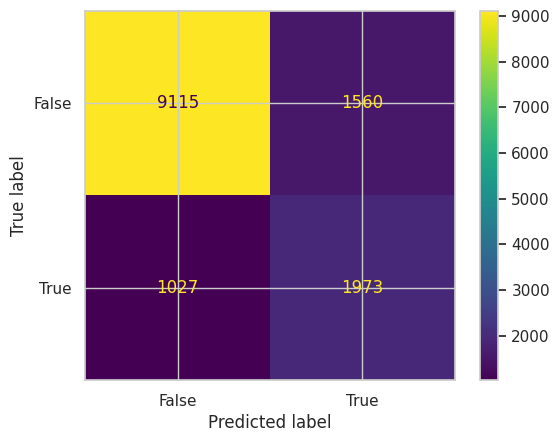

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf_m,display_labels = [False, True])
cm_display.plot()
plt.show()

In [ ]:
new_record = pd.DataFrame({
    'MinTemp': [15.9],
    'MaxTemp': [20.8],
    'Rainfall': [32.6],
    'WindGustSpeed': [44],
    'WindSpeed9am': [15],
    'WindSpeed3pm': [19],
    'Humidity9am': [94],
    'Humidity3pm': [77],
    'Pressure9am': [1011.9],
    'Pressure3pm': [1010.2],
    'Temp9am': [16.6],
    'Temp3pm': [20.6],
   'Evaporation': [3],
    'Sunshine': [0.3],
    'WindGustDir': ['ESE'],  # Encode categorical values if necessary
    'WindDir9am': ['ESE'],
    'WindDir3pm': ['ESE'],
    'RainToday': ['Yes'],  # Encode this too
    'Location': ['Cobar'] ,
    'Cloud9am':[8],
    'Cloud3pm':[7]

})

from sklearn.preprocessing import LabelEncoder

# Create a label encoder instance
label_encoder = LabelEncoder()


new_record['WindGustDir'] = label_encoder.fit_transform(new_record['WindGustDir'])
new_record['WindDir9am'] = label_encoder.fit_transform(new_record['WindDir9am'])
new_record['WindDir3pm'] = label_encoder.fit_transform(new_record['WindDir3pm'])
new_record['RainToday'] = label_encoder.fit_transform(new_record['RainToday'])
new_record['Location'] = label_encoder.fit_transform(new_record['Location'])

new_record = pd.get_dummies(new_record, columns=['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'])


# Use the trained model to make predictions
new_predictions = dt.predict(new_record)
#print(new_predictions)

# Print the prediction for the new record
if new_predictions[0] == 1:
    print("It will rain tomorrow.")
else:
    print("It will not rain tomorrow.")




It will rain tomorrow.


In [ ]:
model_filename = "decision_tree_model.pkl"
with open(model_filename,'wb') as model_file:
  pickle.dump(dt,model_file)

In [ ]:
filename = "label_encoder.pkl"
with open(filename, 'wb') as file:
    pickle.dump(label_encoder, file)
